In [1]:
# YOLOv5 클론 및 설치
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

# Intel RealSense SDK 설치 (선택 사항)
#!pip install pyrealsense2


'yolov5'에 복제합니다...
remote: Enumerating objects: 16680, done.
remote: Total 16680 (delta 0), reused 0 (delta 0), pack-reused 16680
오브젝트를 받는 중: 100% (16680/16680), 15.15 MiB | 14.21 MiB/s, 완료.
델타를 알아내는 중: 100% (11479/11479), 완료.
/home/piai/다운로드/yolov5


In [2]:
import torch


print('Using PyTorch version:', torch.__version__)
if torch.cuda.is_available():
    print('Using GPU, device name:', torch.cuda.get_device_name(0))
    device = torch.device('cuda')
else:
    print('No GPU found, using CPU instead.')
    device = torch.device('cpu')

Using PyTorch version: 2.3.1+cu121
Using GPU, device name: NVIDIA GeForce RTX 2080


In [3]:
%cat /home/piai/다운로드/yolov5/green_fruits/data.yaml

train: /home/piai/다운로드/yolov5/green_fruits/train/images
val: /home/piai/다운로드/yolov5/green_fruits/valid/images
test: /home/piai/다운로드/yolov5/green_fruits/test/images

nc: 3
names: ['green fruit', 'remove', 'stem']

roboflow:
  workspace: lego-kmwtq
  project: green-fruits-new-version
  version: 3
  license: Public Domain
  url: https://universe.roboflow.com/lego-kmwtq/green-fruits-new-version/dataset/3


In [4]:
%cd /home/piai/다운로드/yolov5/

!python segment/train.py --img 512 --batch 32 --epochs 50 --data /home/piai/다운로드/yolov5/green_fruits/data.yaml --weights yolov5s-seg.pt --name v5result

/home/piai/다운로드/yolov5
segment/train: weights=yolov5s-seg.pt, cfg=, data=/home/piai/다운로드/yolov5/green_fruits/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=512, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=v5result, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7974MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, f


      Epoch    GPU_mem   box_loss   seg_loss   obj_loss   cls_loss  Instances       Size
       7/49      4.97G    0.06853    0.03054    0.03734     0.0248        207   
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331      0.533      0.384      0.257     0.0968      0.536      0.375      0.263      0.153

      Epoch    GPU_mem   box_loss   seg_loss   obj_loss   cls_loss  Instances       Size
       8/49      4.97G    0.06433    0.02816    0.03524    0.02504        154   
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331      0.473       0.43      0.233      0.104      0.473      0.428      0.243       0.14

      Epoch    GPU_mem   box_loss   seg_loss   obj_loss   cls_loss  Instances       Size
       9/49      4.97G    0.06079    0.02998    0.03516    0.02424        199   
                 Class     Images  Instances      Box(P    

      28/49      4.97G    0.02888    0.01714    0.02471    0.01499        190   
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331      0.629       0.49       0.54      0.402      0.629       0.49      0.532      0.432

      Epoch    GPU_mem   box_loss   seg_loss   obj_loss   cls_loss  Instances       Size
      29/49      4.98G    0.02846    0.01707    0.02508     0.0146        186   
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331       0.46      0.684      0.561      0.421       0.46      0.684       0.56      0.444

      Epoch    GPU_mem   box_loss   seg_loss   obj_loss   cls_loss  Instances       Size
      30/49      4.98G    0.02618    0.01652    0.02528     0.0143        210   
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331      0.455       0.66  

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331      0.637      0.563      0.581      0.493      0.637      0.563      0.581      0.482

50 epochs completed in 0.116 hours.
Optimizer stripped from runs/train-seg/v5result/weights/last.pt, 15.2MB
Optimizer stripped from runs/train-seg/v5result/weights/best.pt, 15.2MB

Validating runs/train-seg/v5result/weights/best.pt...
Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         90        331      0.594       0.57      0.583      0.497      0.594       0.57      0.584      0.481
           green fruit         90         95       0.68      0.738      0.737      0.667       0.68      0.738      0.737       0.69
                remove         90        223      0.782      0.741      0.819      0.686      0.782      0.741   

segment/predict: weights=['runs/train-seg/v5result/weights/best.pt'], source=/home/piai/다운로드/yolov5/green_fruits/test/images/VNWKyewgPGnTw6AFhjiu2a_jpg.rf.283c64f92c57ff0b71b92be68d6de04a.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7974MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 /home/piai/다운로드/yolov5/green_fruits/test/images/VNWKyewgPGnTw6AFhjiu2a_jpg.rf.283c64f92c57ff0b71b92be68d6de04a.jpg: 320x320 1 green fruit, 19 removes, 6.0ms
Speed: 0.3ms pre-process, 6

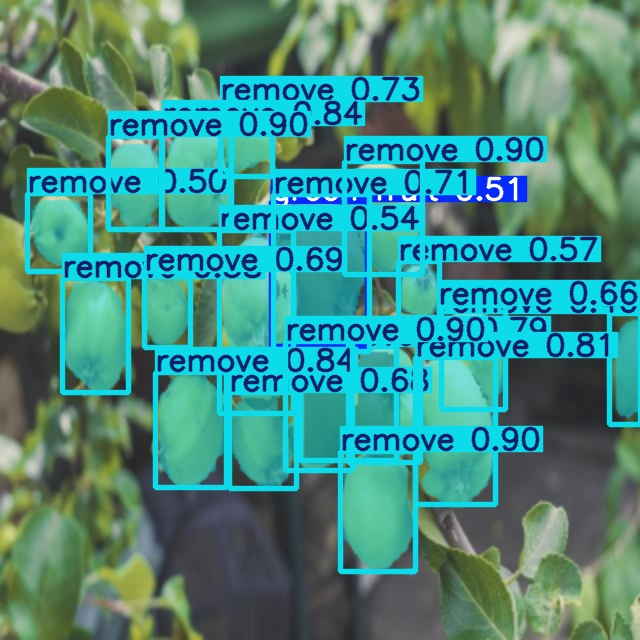

In [6]:
import os
from IPython.display import Image

# 데이터셋 경로를 직접 정의
dataset_path = "/home/piai/다운로드/yolov5/green_fruits"

#Get the path of an image from the test or validation set
if os.path.exists(os.path.join(dataset_path, "test")):
    split_path = os.path.join(dataset_path, "test", "images")
else:
    split_path = os.path.join(dataset_path, "valid", "images")
    
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

#Infer
!python segment/predict.py --img 320 --weights runs/train-seg/v5result/weights/best.pt --source {example_image_path}

# 결과 이미지 표시
result_image_path = f'runs/predict-seg/exp/{example_image_name}'
Image(filename=result_image_path, width=600)

In [7]:
!python segment/predict.py --img 320 --weights runs/train-seg/v5result/weights/best.pt --source /home/piai/다운로드/yolov5/green_fruits/test/images

segment/predict: weights=['runs/train-seg/v5result/weights/best.pt'], source=/home/piai/다운로드/yolov5/green_fruits/test/images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.9 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7974MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/55 /home/piai/다운로드/yolov5/green_fruits/test/images/-_-_-_-3-_jpg.rf.4654103c40f51ea9c5f1a36213971a5f.jpg: 320x320 1 green fruit, 6 removes, 2 stems, 5.2ms
image 2/55 /home/piai/다운로드/yolov5/green_fruits/test/images/-_-_-_-_-8-_jpg.rf.cc0de292cfc31b27e148

image 48/55 /home/piai/다운로드/yolov5/green_fruits/test/images/images-63-_jpeg.rf.c9e91b9b2bab1fc3b71724e99290cbc6.jpg: 320x320 1 green fruit, 3 removes, 5.2ms
image 49/55 /home/piai/다운로드/yolov5/green_fruits/test/images/images-88-_jpeg.rf.0992683445453c3ba7d9b5cf5be09fc4.jpg: 320x320 2 removes, 5.5ms
image 50/55 /home/piai/다운로드/yolov5/green_fruits/test/images/images-89-_jpeg.rf.21d4ad694204091dcb9ca26b567505b7.jpg: 320x320 1 green fruit, 7 removes, 5.3ms
image 51/55 /home/piai/다운로드/yolov5/green_fruits/test/images/images-91-_jpeg.rf.d6d5836fa9afc0dbbd6341beea4f5724.jpg: 320x320 1 green fruit, 2 removes, 5.4ms
image 52/55 /home/piai/다운로드/yolov5/green_fruits/test/images/images-97-_jpeg.rf.e9e9ede7f4b565d0225fb26a960297bf.jpg: 320x320 1 green fruit, 3 removes, 5.4ms
image 53/55 /home/piai/다운로드/yolov5/green_fruits/test/images/istockphoto-1325936689-612x612_jpg.rf.024e77cd444fc0aef47c4c9ba9f6eec9.jpg: 320x320 1 green fruit, 2 removes, 5.5ms
image 54/55 /home/piai/다운로드/yolov5/green_fruits/test/i